### 贫困与非贫困户的识别问题
本文基于问卷调查数据，选取了一些特征，构建模型判断贫困与非贫困户与否。<br>
显而易见，这是一个二分类问题，可构建的模型较多，如：logistic、决策树、svm都可以

**<font color=red>看看数据长什么样</font>**<br>
还是用pandas加载数据

In [1]:
# 这个ipython notebook主要是我解决Kaggle Titanic问题的思路和过程

import pandas as pd #数据分析
import numpy as np #科学计算
from pandas import Series,DataFrame

data_train = pd.read_excel(r"C:\Users\10755\Desktop\wjj\poverty_analyze.xlsx",header=1,index=True).dropna()
data_train.head() #打印前五个样本数据

,population,illness,labor,migrant_works,edu,culture,transp_tools,per_house_srea,danger_house,pcdi,subsidize_revenue_ratio,per_cultivated_area,meals,clothing,water,toilet,poverty
0,6.0,0.0,2.0,1.0,2,1.0,0.0,30.0,0.0,6000.000000,0.000000,0.000000,5.0,0.0,0.0,1.0,0.0
1,6.0,1.0,2.0,1.0,2,1.0,0.0,25.0,0.0,6037.333333,0.006184,0.000000,5.0,0.0,0.0,1.0,0.0
2,6.0,0.0,2.0,1.0,2,2.0,1.0,35.0,0.0,6570.000000,0.089636,0.500000,5.0,0.0,0.0,1.0,0.0
3,6.0,1.0,2.0,1.0,2,2.0,0.0,35.0,0.0,6704.000000,0.005569,0.000000,5.0,0.0,0.0,1.0,0.0
4,8.0,0.0,2.0,1.0,2,2.0,0.0,35.0,0.0,6716.500000,0.050845,13.333333,4.0,0.0,0.0,1.0,0.0


**<font color=red>我们看大概有以下这些字段</font>**<br>
population => 常住人口数目，离散型变量<br>
illness => 生病或残疾（有1，无0），类目属性<br>
labor => 家庭劳动能力（无=1，普通劳动力=2，技能劳动力=3），类目属性变量<br>
migrant_works => 外出务工人数，离散型变量<br>
edu =>子女义务教育在读人数，离散型变量<br>
culture=> 户主文化程度（文盲=1，小学初中=2，高中及以上=3），类目属性变量<br>
transp_tools => 生产性资产，有无交通工具/工具（有交通工具或生产工具=0，无=1），类目属性变量<br>
per_house_srea => 人均住房面积，连续变量<br>
danger_house => 是否危房（是=1，否=0），类目属性变量<br>
pcdi => 家庭人均可支配收入，连续变量<br>
subsidize_revenue_ratio	 => 补贴性收入占家庭收入比率，连续变量<br>
per_cultivated_area	 => 人均家庭耕地面积，连续变量<br>
meals=> 吃荤（每天=5，2天=4，2天=3，一个月=2，不吃=1），类目属性变量<br>
clothing=> 衣服齐全（2套以上=0，2套以下=1），类目属性变量<br>
water=> 饮用水（地下水或自来水=0，无=1），类目属性变量<br>
toilet=> 卫生厕所（有=1，无=0），类目属性变量<br>
poverty=> 是否贫困（是=1，否=0），类目属性变量，是我们要分类的类别

**<font color=red>我这么懒的人显然会让pandas自己先告诉我们一些信息<font>**

In [2]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 426
Data columns (total 17 columns):
population                 426 non-null float64
illness                    426 non-null float64
labor                      426 non-null float64
migrant_works              426 non-null float64
edu                        426 non-null int64
culture                    426 non-null float64
transp_tools               426 non-null float64
per_house_srea             426 non-null float64
danger_house               426 non-null float64
pcdi                       426 non-null float64
subsidize_revenue_ratio    426 non-null float64
per_cultivated_area        426 non-null float64
meals                      426 non-null float64
clothing                   426 non-null float64
water                      426 non-null float64
toilet                     426 non-null float64
poverty                    426 non-null float64
dtypes: float64(16), int64(1)
memory usage: 59.9 KB


#### <font color=red>上面的数据说啥了？它告诉我们，总共有426个样本，剔除了一个缺省值样本。

In [3]:
data_train.describe()

,population,illness,labor,migrant_works,edu,culture,transp_tools,per_house_srea,danger_house,pcdi,subsidize_revenue_ratio,per_cultivated_area,meals,clothing,water,toilet,poverty
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,3.380282,0.507042,1.835681,0.983568,0.683099,1.767606,0.577465,29.719953,0.082160,10844.778388,0.373875,1.774525,4.258216,0.049296,0.068075,1.007042,0.546948
std,1.965822,0.500538,0.519044,0.694321,0.857106,0.709586,0.494544,14.048317,0.274931,12202.886307,0.383459,10.088166,0.790527,0.216739,0.252171,0.128144,0.498376
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1200.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,20.000000,0.000000,4001.500000,0.022253,0.000000,4.000000,0.000000,0.000000,1.000000,0.000000
50%,3.000000,1.000000,2.000000,1.000000,0.000000,2.000000,1.000000,30.000000,0.000000,5321.500000,0.229550,0.000000,4.000000,0.000000,0.000000,1.000000,1.000000
75%,5.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,42.000000,0.000000,13590.000000,0.762875,0.618750,5.000000,0.000000,0.000000,1.000000,1.000000
max,12.000000,1.000000,3.000000,3.000000,4.000000,3.000000,1.000000,61.000000,1.000000,106960.000000,1.306320,180.000000,5.000000,1.000000,1.000000,2.000000,1.000000


<font color=red>mean字段告诉我们，非贫困样本和贫困样本数是均衡的，有利与我们后期建模，平均每个家庭有3.38个人口，每个家庭有1.83个劳动力(计算这个时候会略掉无记录的)，人均家庭可支配收入10844万元，等等…<font>

* <font color=red>『对数据的认识太重要了！』<font>
* <font color=red>『对数据的认识太重要了！』<font>
* <font color=red>『对数据的认识太重要了！』<font>

<font color=red>上面的简单描述信息并没有什么卵用啊，咱们得再细一点分析下数据啊。<font><br>
<font color=red>看看**每个/多个 属性和最后的贫困户识别**之间有着什么样的关系<font>

In [4]:
import matplotlib.pyplot as plt
# %matplotlib notebook
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.figsize'] = (10.0, 8.0) 


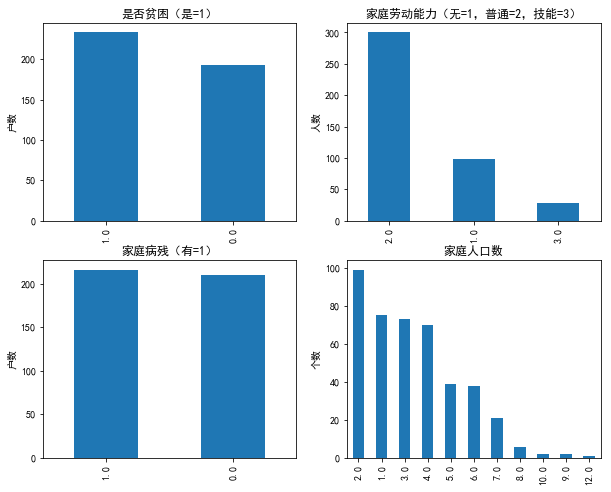

In [5]:

fig1 = plt.figure()
fig1.set(alpha=0.2,)  # 设定图表颜色alpha参数

plt.subplot2grid((2,2),(0,0))             # 在一张大图里分列几个小图
data_train.poverty.value_counts().plot(kind='bar',)# plots a bar graph of those who surived vs those who did not. 
plt.title(u"是否贫困（是=1）") # puts a title on our graph
plt.ylabel(u"户数")  

plt.subplot2grid((2,2),(0,1))
data_train.labor.value_counts().plot(kind="bar")
plt.ylabel(u"人数")
plt.title(u"家庭劳动能力（无=1，普通=2，技能=3）")


plt.subplot2grid((2,2),(1,0))
data_train.illness.value_counts().plot(kind='bar')
plt.title(u"家庭病残（有=1）")
plt.ylabel(u"户数")  

plt.subplot2grid((2,2),(1,1))
data_train.population.value_counts().plot(kind='bar')
plt.title(u"家庭人口数")
plt.ylabel(u"个数") 
plt.show()


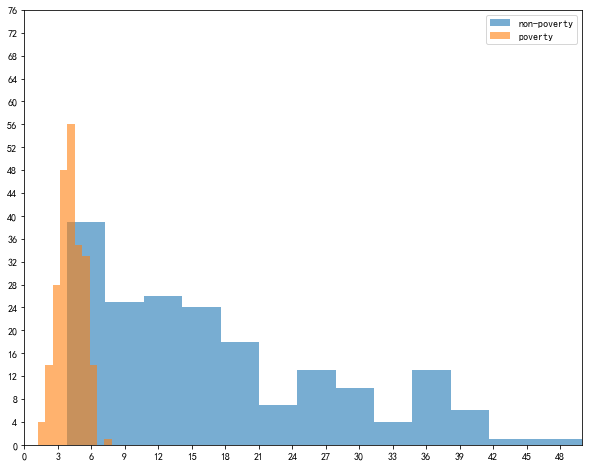

In [6]:
#分类别统计家庭人均可支配收入
fig,ax=plt.subplots()
ax.hist(data_train.pcdi[data_train.poverty == 0]/1000,bins=30,histtype="stepfilled",alpha=0.6,label="non-poverty")
ax.hist(data_train.pcdi[data_train.poverty == 1]/1000,bins=10,histtype="stepfilled",alpha=0.6,label="poverty")
ax.legend()
ax.set_xticks(np.arange(0,int(data_train.pcdi.max()/1000),3))
ax.set_xlim(0,50)
ax.set_yticks(np.arange(0,80,4))
plt.show()

<font color=red>从上图可以看出，贫困户家庭的人均可支配收入主要集中在1.5k~6之间，分布比较集中，而非贫困户集中与4k~45k，分布区间长，所以从经济角度指标可以显著衡量家庭贫困与否，因此，这个特征对于区分家庭贫困与否很重要<font>

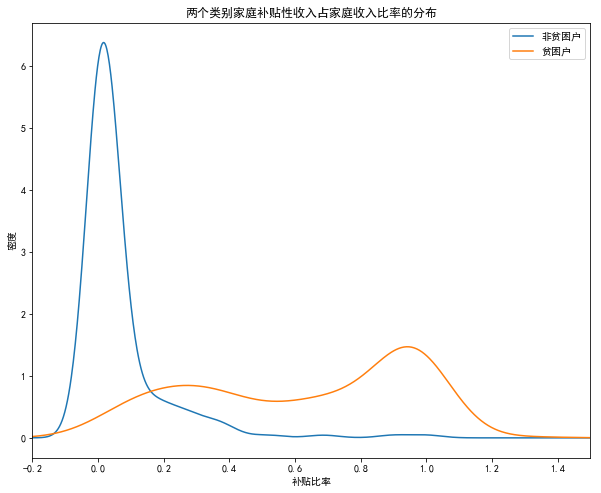

In [7]:
#分类别统计家庭补贴性收入占家庭收入比率
fig3 = plt.figure()
fig3.set(alpha=0.2)  # 设定图表颜色alpha参数
data_train.subsidize_revenue_ratio[data_train.poverty == 0].plot(kind='kde')
data_train.subsidize_revenue_ratio [data_train.poverty == 1].plot(kind='kde')
plt.xlabel(u"补贴比率")# plots an axis lable
plt.xlim(-0.2,1.5)
plt.ylabel(u"密度") 
plt.title(u"两个类别家庭补贴性收入占家庭收入比率的分布")
plt.legend((u'非贫困户', u'贫困户'),loc='best') # sets our legend for our graph.
plt.show()

于是得到了像下面这样一张图：<br>
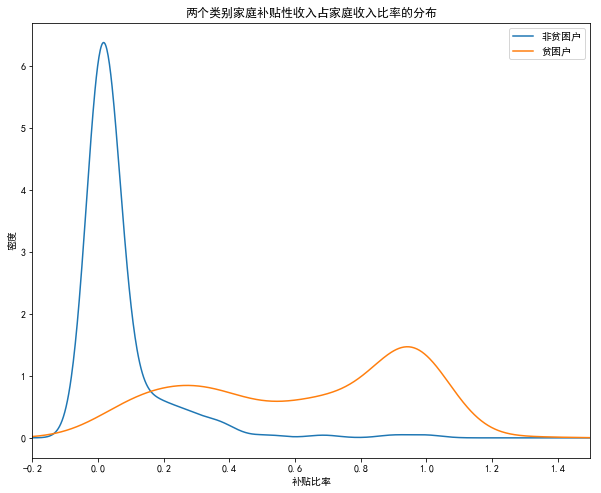![](http://7xo0y8.com1.z0.glb.clouddn.com/2_titanic/8.png)

<font color=red>非贫困户家庭的补贴性收入占比主要集中于0值附近，而贫困户家庭的补贴性收入占比分布比较均匀，说明贫困户家庭的补贴性收入来量要多于非贫困家庭<font>

In [8]:
#看看户主的文化程度与家庭贫困之间的关系
poverty= data_train.culture[data_train.poverty == 1].value_counts()
non_poverty= data_train.culture[data_train.poverty == 0].value_counts()
df1=pd.DataFrame({u'非贫困':non_poverty, u'贫困':poverty })
df1

,贫困,非贫困
1.0,139.0,29
2.0,94.0,95
3.0,NaN,69


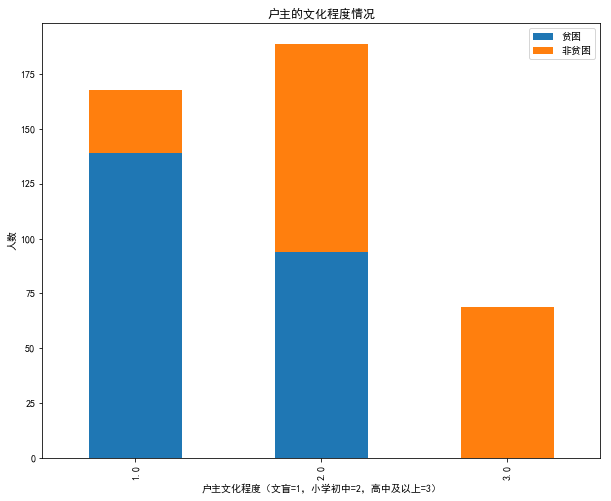

In [9]:
fig4 = plt.figure()
fig4.set(alpha=0.2)  # 设定图表颜色alpha参数
df1.plot(kind='bar', stacked=True)
plt.title(u"户主的文化程度情况")
plt.xlabel(u"户主文化程度（文盲=1，小学初中=2，高中及以上=3）") 
plt.ylabel(u"人数") 
plt.show()

<font color=red>从户主教育程度来看，贫困户家庭户主的教育主要是文盲占的比例高，并且没有高中以上学历，而非贫困户家庭户主文化主要以初中和高中学历居多，因此可以猜测户主的教育程度是影响一个家庭的贫困情况<font>

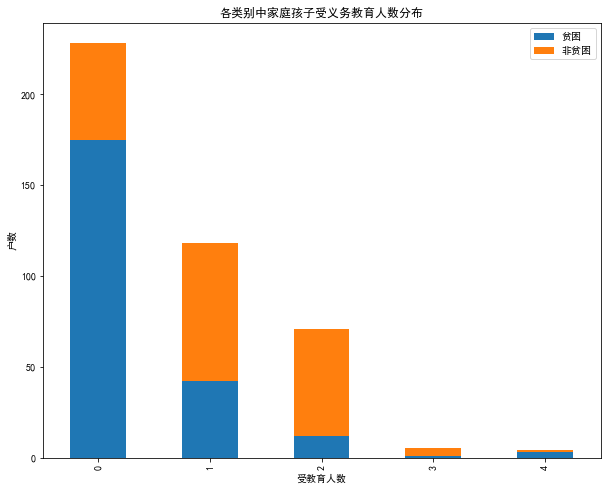

,贫困,非贫困
0,175,53
1,42,76
2,12,59
3,1,4
4,3,1


In [10]:
#看看家庭孩子受义务教育人数与家庭贫困之间的关系
fig5 = plt.figure()
fig5.set(alpha=0.2)  # 设定图表颜色alpha参数
poverty = data_train.edu[data_train.poverty == 1].value_counts()
non_poverty = data_train.edu[data_train.poverty == 0].value_counts()
df2=pd.DataFrame({u'贫困':poverty, u'非贫困':non_poverty})
df2.plot(kind='bar', stacked=True)
plt.title(u"各类别中家庭孩子受义务教育人数分布")
plt.xlabel(u"受教育人数") 
plt.ylabel(u"户数") 
plt.show()
df2

<font color=red>从这张图中能看出，贫困家庭中大多数贫困家庭没有孩子在接受义务教育，而非贫困户家庭中有很大一部份孩子在教授义务教育，这与我之前预想的有点出入，我想家庭中孩子受教育越多，越可能是贫困户家庭，仔细想想，是因为国家对义务教育年龄段的孩子受教育补贴加重，大多数家庭在义务阶段受教育对家庭经济影响较小。导致贫困户与非贫困户家庭在受义务教育阶段孩子数差别较大的原因可能在于：贫困家庭不重视教育，而非贫困户家庭重视教育<font><br>

![](http://7xo0y8.com1.z0.glb.clouddn.com/2_titanic/Embarked.png?imageView/2/w/500/q/100)

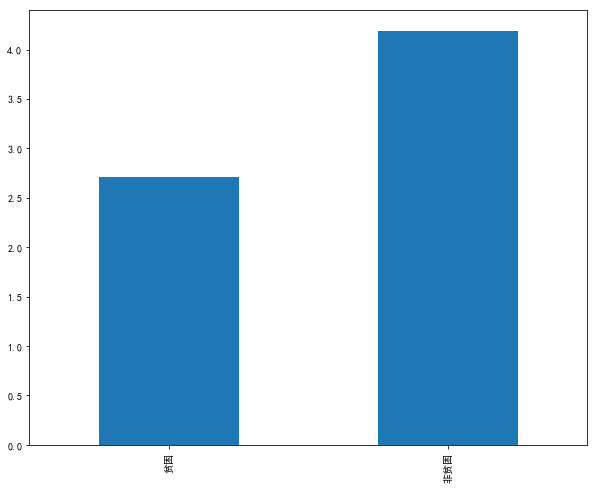

贫困     2.708155
非贫困    4.191710
dtype: float64

In [11]:
#看看贫困与非贫困户家庭户均人口数
fig6 = plt.figure()
fig6.set(alpha=0.2)  # 设定图表颜色alpha参数
non_poverty= data_train.population[data_train.poverty == 0].mean()
poverty  = data_train.population[data_train.poverty ==1].mean()
ser=pd.Series({u'非贫困':non_poverty, u'贫困':poverty})
ser.plot(kind='bar')
plt.show()
ser

In [12]:
# 因为逻辑回归建模时，需要输入的特征都是数值型特征
# 我们先对类目型的特征离散/因子化
# 以illness为例，原本一个属性维度，因为其取值可以是['1','0']，而将其平展开为'Cabin_1','Cabin_0'两个属性
# 原本Cabin取值为1的，在此处的'Cabin_1'下取值为1，在'Cabin_0'下取值为0
# 原本Cabin取值为0的，在此处的'Cabin_1'下取值为0，在'Cabin_0'下取值为1
# 我们使用pandas的get_dummies来完成这个工作，并拼接在原来的data_train之上，如下所示
dummies_illness = pd.get_dummies(data_train['illness'], prefix= 'illness')
dummies_labor = pd.get_dummies(data_train['labor'], prefix= 'labor')
dummies_culture = pd.get_dummies(data_train['culture'], prefix= 'culture')
dummies_transp_tools = pd.get_dummies(data_train['transp_tools'], prefix= 'transp_tools')
dummies_danger_house = pd.get_dummies(data_train['danger_house'], prefix= 'danger_house')
dummies_meals = pd.get_dummies(data_train['meals'], prefix= 'meals')
dummies_clothing= pd.get_dummies(data_train['clothing'], prefix= 'clothing')
dummies_water= pd.get_dummies(data_train['water'], prefix= 'water')
dummies_toilet= pd.get_dummies(data_train['toilet'], prefix= 'toilet')

df = pd.concat([data_train, dummies_illness, dummies_labor, dummies_culture,dummies_transp_tools,\
                dummies_danger_house,dummies_meals,dummies_clothing,dummies_water,dummies_toilet], axis=1)
df.drop(['illness', 'labor', 'culture', 'transp_tools', 'danger_house','meals','clothing','water','toilet'], axis=1, inplace=True)
df.head()

,population,migrant_works,edu,per_house_srea,pcdi,subsidize_revenue_ratio,per_cultivated_area,poverty,illness_0.0,illness_1.0,...,meals_3.0,meals_4.0,meals_5.0,clothing_0.0,clothing_1.0,water_0.0,water_1.0,toilet_0.0,toilet_1.0,toilet_2.0
0,6.0,1.0,2,30.0,6000.000000,0.000000,0.000000,0.0,1,0,...,0,0,1,1,0,1,0,0,1,0
1,6.0,1.0,2,25.0,6037.333333,0.006184,0.000000,0.0,0,1,...,0,0,1,1,0,1,0,0,1,0
2,6.0,1.0,2,35.0,6570.000000,0.089636,0.500000,0.0,1,0,...,0,0,1,1,0,1,0,0,1,0
3,6.0,1.0,2,35.0,6704.000000,0.005569,0.000000,0.0,0,1,...,0,0,1,1,0,1,0,0,1,0
4,8.0,1.0,2,35.0,6716.500000,0.050845,13.333333,0.0,1,0,...,0,1,0,1,0,1,0,0,1,0


<font color=red>我们还得做一些处理，仔细看看pcdi、per_cultivated_area以及per_house_srea两个属性，乘客的数值幅度变化，也忒大了吧！！如果大家了解逻辑回归与梯度下降的话，会知道，各属性值之间scale差距太大，将对收敛速度造成几万点伤害值！甚至不收敛！ (╬▔皿▔)…所以我们先用scikit-learn里面的preprocessing模块对这俩货做一个scaling，所谓scaling，其实就是将一些变化幅度较大的特征化到[-1,1]之内。<font>

In [13]:
# 接下来我们要接着做一些数据预处理的工作，比如scaling，将一些变化幅度较大的特征化到[-1,1]之内
# 这样可以加速logistic regression的收敛
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(df['pcdi'].values.reshape(-1,1))
df['pcdi_scaled'] = scaler.fit_transform(df['pcdi'].values.reshape(-1,1), age_scale_param)
fare_scale_param = scaler.fit(df['per_cultivated_area'].values.reshape(-1,1))
df['per_cultivated_area_scaled'] = scaler.fit_transform(df['per_cultivated_area'].values.reshape(-1,1), fare_scale_param)
fare_scale_param = scaler.fit(df['per_house_srea'].values.reshape(-1,1))
df['per_house_srea_scaled'] = scaler.fit_transform(df['per_house_srea'].values.reshape(-1,1), fare_scale_param)
df.drop(['pcdi', 'per_cultivated_area', 'per_house_srea'], axis=1, inplace=True)
df.head()

,population,migrant_works,edu,subsidize_revenue_ratio,poverty,illness_0.0,illness_1.0,labor_1.0,labor_2.0,labor_3.0,...,clothing_0.0,clothing_1.0,water_0.0,water_1.0,toilet_0.0,toilet_1.0,toilet_2.0,pcdi_scaled,per_cultivated_area_scaled,per_house_srea_scaled
0,6.0,1.0,2,0.000000,0.0,1,0,0,1,0,...,1,0,1,0,0,1,0,-0.397486,-0.176109,0.019958
1,6.0,1.0,2,0.006184,0.0,0,1,0,1,0,...,1,0,1,0,0,1,0,-0.394423,-0.176109,-0.336375
2,6.0,1.0,2,0.089636,0.0,1,0,0,1,0,...,1,0,1,0,0,1,0,-0.350721,-0.126487,0.376291
3,6.0,1.0,2,0.005569,0.0,0,1,0,1,0,...,1,0,1,0,0,1,0,-0.339727,-0.176109,0.376291
4,8.0,1.0,2,0.050845,0.0,1,0,0,1,0,...,1,0,1,0,0,1,0,-0.338701,1.147126,0.376291


<font color=red>我们把需要的feature字段取出来，转成numpy格式，使用scikit-learn中的LogisticRegression建模。<font>

In [14]:
from sklearn import linear_model

x_df = df.filter(regex='population|migrant_works|edu|subsidize_revenue_ratio|illness_.*|labor_.*| \
                     |culture_.*|transp_tools_.*|danger_house_.*|meals_.*|clothing_.*|water_.*|toilet_.*|pcdi_.*|per_cultivated_area_.*|\
                     |per_house_srea_.*',axis=1)
# train_np = train_df.as_matrix()
# train_np


x_df.head()


,population,migrant_works,edu,subsidize_revenue_ratio,illness_0.0,illness_1.0,labor_1.0,labor_2.0,labor_3.0,culture_1.0,...,clothing_0.0,clothing_1.0,water_0.0,water_1.0,toilet_0.0,toilet_1.0,toilet_2.0,pcdi_scaled,per_cultivated_area_scaled,per_house_srea_scaled
0,6.0,1.0,2,0.000000,1,0,0,1,0,1,...,1,0,1,0,0,1,0,-0.397486,-0.176109,0.019958
1,6.0,1.0,2,0.006184,0,1,0,1,0,1,...,1,0,1,0,0,1,0,-0.394423,-0.176109,-0.336375
2,6.0,1.0,2,0.089636,1,0,0,1,0,0,...,1,0,1,0,0,1,0,-0.350721,-0.126487,0.376291
3,6.0,1.0,2,0.005569,0,1,0,1,0,0,...,1,0,1,0,0,1,0,-0.339727,-0.176109,0.376291
4,8.0,1.0,2,0.050845,1,0,0,1,0,0,...,1,0,1,0,0,1,0,-0.338701,1.147126,0.376291


In [15]:
y_df = df['poverty']
y_df.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: poverty, dtype: float64

In [16]:
# y即poverty结果
y = y_df.as_matrix()
# X即特征属性值
X = x_df.as_matrix()

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [23]:
# fit到RandomForestRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(x_train,y_train)  
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

### 要判定一下当前模型所处状态(欠拟合or过拟合)

<font color=red>有一个很可能发生的问题是，我们不断地做feature engineering，产生的特征越来越多，用这些特征去训练模型，会对我们的训练集拟合得越来越好，同时也可能在逐步丧失泛化能力，从而在待预测的数据上，表现不佳，也就是发生过拟合问题。<font><br>

<font color=red>从另一个角度上说，如果模型在待预测的数据上表现不佳，除掉上面说的过拟合问题，也有可能是欠拟合问题，也就是说在训练集上，其实拟合的也不是那么好。<font><br>

<font color=red>额，这个欠拟合和过拟合怎么解释呢。这么说吧：<font><br>

1. <font color=red>过拟合就像是你班那个学数学比较刻板的同学，老师讲过的题目，一字不漏全记下来了，于是老师再出一样的题目，分分钟精确出结果。but数学考试，因为总是碰到新题目，所以成绩不咋地。<font>
2. <font color=red>欠拟合就像是，咳咳，和博主level差不多的差生。连老师讲的练习题也记不住，于是连老师出一样题目复习的周测都做不好，考试更是可想而知了。<font>

<font color=red>而在机器学习的问题上，对于过拟合和欠拟合两种情形。我们优化的方式是不同的。<font><br>

<font color=red>对过拟合而言，通常以下策略对结果优化是有用的：<font><br>

* <font color=red>做一下feature selection，挑出较好的feature的subset来做training
* <font color=red>提供更多的数据，从而弥补原始数据的bias问题，学习到的model也会更准确

<font color=red>而对于欠拟合而言，我们通常需要更多的feature，更复杂的模型来提高准确度。<font><br>

<font color=red>著名的learning curve可以帮我们判定我们的模型现在所处的状态。我们以样本数为横坐标，训练和交叉验证集上的错误率作为纵坐标，两种状态分别如下两张图所示：过拟合(overfitting/high variace)，欠拟合(underfitting/high bias)<font><br>

![](http://7xo0y8.com1.z0.glb.clouddn.com/2_titanic/high_variance.png?imageView/2/w/400/q/100)
![](http://7xo0y8.com1.z0.glb.clouddn.com/2_titanic/high_bias.png?imageView/2/w/400/q/100)

<font color=red>著名的learning curve可以帮我们判定我们的模型现在所处的状态。我们以样本数为横坐标，训练和交叉验证集上的错误率作为纵坐标，两种状态分别如下两张图所示：过拟合(overfitting/high variace)，欠拟合(underfitting/high bias)<font><br>

<font color=red>我们也可以把错误率替换成准确率(得分)，得到另一种形式的learning curve(sklearn 里面是这么做的)。<font><br>

<font color=red>回到我们的问题，我们用scikit-learn里面的learning_curve来帮我们分辨我们模型的状态。举个例子，这里我们一起画一下我们最先得到的baseline model的learning curve。<font><br>

<IPython.core.display.Javascript object>


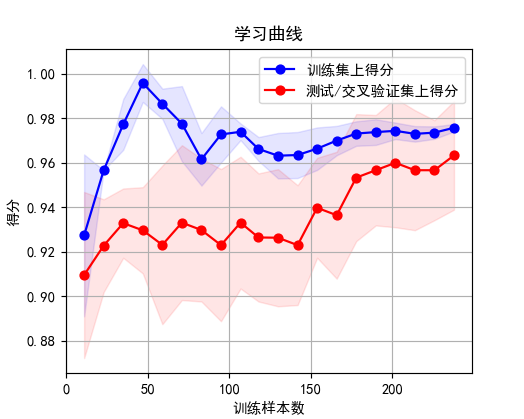

(0.95806368276966092, 0.038494483200173679)

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve
%matplotlib notebook
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.figsize'] = (5.0, 4.0) 

# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数")
        plt.ylabel(u"得分")
        plt.gca().invert_yaxis() #纵坐标反向
        plt.grid()  #设置网格线
    
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"测试/交叉验证集上得分")
    
        plt.legend(loc="best")
        
        plt.draw()
        plt.gca().invert_yaxis()
        plt.show()
    
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(clf, u"学习曲线", x_train,y_train,cv=5)

<font color ='red'>从学习曲线可以看出，训练基模型在训练集上预测效果要稍微好于测试集，具有一定的过拟合风险，因此我们可以做一个集成模型能避免过拟合的风险，我们用一个最简单算法bagging集成算法模型，用测试集来计算评价指标：查全率和查准率，最终评价模型优劣<font>

In [30]:
pd.DataFrame({"columns":list(x_df.columns), "coef":list(clf.coef_.T)})

,coef,columns
0,[-0.560081087404],population
1,[1.81206238517],migrant_works
2,[-0.408260462279],edu
3,[2.01531649775],subsidize_revenue_ratio
4,[-1.03958968229],illness_0.0
5,[0.0],illness_1.0
6,[2.54342758118],labor_1.0
7,[0.0],labor_2.0
8,[0.0],labor_3.0
9,[-0.438712162197],culture_1.0


In [32]:
from sklearn import cross_validation
from sklearn.ensemble import BaggingRegressor
clf = linear_model.LogisticRegression(C=1.0, penalty='l2', tol=1e-6)
bagging_clf = BaggingRegressor(clf, n_estimators=100,  bootstrap=True, bootstrap_features=False, n_jobs=-1)
# fit到BaggingRegressor之中
bagging_clf.fit(x_train, y_train)

BaggingRegressor(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [35]:
from sklearn.metrics import classification_report
predict_y = bagging_clf.predict(x_test)
def cl(x):
    if x>0.5:
        return 1
    else:
        return 0
predict_y_cla =list(map(lambda x:cl(x),predict_y ))
print("classification_report:\n",classification_report(y_test,predict_y_cla))

classification_report:
              precision    recall  f1-score   support

        0.0       1.00      0.93      0.96        54
        1.0       0.95      1.00      0.97        74

avg / total       0.97      0.97      0.97       128



<font color ='red'>从模型效果来看，无论是查准率还是查全率都能保证在0.98，说明模型的整体精度可以在98%左右，如果想进一步优化模型，需要增加样本量，本次模型训练样本量只有将近300个<font>